# 第7章 Matplotlib

**本章内容提要**：

- Matplotlib命名约定
- Matplotlib三种绘图场景
- Matplotlib两种应用接口
- 基本图形绘制

简单的图形可以给数据分析师带来比其他任何设备更多的信息。在上一章中，本书介绍了Python数据分析最核心的底层库NumPy、基于ndarray对象的数组操作方法与基本统计。本章将开始指引读者从更直观的角度——“图形”——了解数据的分布与规律，先学习Matplotlib的基本理念和接口，然后学习如何绘制常见的图形以及更多的自定义。

## 7.1 Matplotlib入门

### 7.1.1 Matplotlib库简介	

数据可视化是数据分析最核心的工作之一，它既能帮助我们探索数据，如寻找异常值，也能够帮助我们汇总分析结果，即所谓的“一图胜千言”。Python有着众多的库可以进行静态或动态的数据可视化，其中最流行的是Matplotlib（<https://matplotlib.org/>）。因此，本书主要利用Matplotlib向读者介绍如何合理地选择和创建图形。

Matplotlib库的历史并不是很久远，它是John Hunter在2002年启动的一个项目，目的是为Python构建商业科学计算软件MATLAB的绘图接口，在2003年发布了0.1版本（实验版本）。Matplotlib的最重要特点是它可以很好地与许多的操作系统和图形后端工作，这意味着我们可以不管使用什么操作系统或是想要什么输出格式的图形（PDF、JPG、PNG、GIF等）都可以依靠它。这种跨平台，一切皆可用的特性成为了Matplotlib最大的长处，并为Matplotlib带来了大量的基础用户和活跃的开发者。

目前，Matplotlib已经和IPython合作，简化了在IPython Shell和Jupyter Notebook中进行交互式绘图的方式。除此之外，Python社区出现了许多以Matplotlib为底层的可视化计算库，其中最有名的是Seaborn（<https://seaborn.pydata.org/>），在本书后续的章节我们会学习它。

### 7.1.2 命名约定

在深入了解如何使用Matplotlib创建图形之前，本书先向读者介绍一些Python科学计算社区通用的命名约定。

在导入NumPy包时，我们使用Python社区约定的np替代numpy。这里，我们也使用Matplotlib的一些标准简写用于导入。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Python用户基本上绘图只会用到pyplot子模块中的功能特性，因此plt是使用Matplotlib绘图最常用的简写。

### 7.1.3 如何展示图形

Matplotlib最佳的使用方法依赖于用户如何使用它，通常有3种应用绘图的场景：脚本、IPython Shell和Jupyter Notebook。

#### 使用脚本绘制

读者如果想要在脚本中使用Matplotlib，通常使用plt.show()函数。该函数会寻找当前活跃的所有图形队形，打开一个或多个交互式的窗口展示图形。

假设下面是代码文件plot.py的内容：

```python
# -*- coding: utf-8 -*- 

# 导入模块/包
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0, 10, 200)

# 绘制图形
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# 显示图形
plt.show()
```

接下来在终端中运行该脚本，读者将看到一个显示图形的窗口弹出来。在此处，plt.show()函数在后台进行了多项工作，它与系统的交互式图形后端进行交流，而Matplotlib向我们隐藏了所有的细节。

```
$ python plot.py
```

![图7-1 弹出的图形](images/chapter7/Figure_1.png)

注意，如果是编写脚本文件进行绘图，一个文件尽量只使用一次plt.show()函数，如果使用多次，图形后端行为将变得不可预测。

#### 从IPython Shell绘制

在IPython Shell中使用Matplotlib非常方便，读者如果指定Matplotlib模式，IPython可以工作得非常好。启动IPython后键入魔术命令“%matplotlib”能够激活该模式。 

In [2]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


这时候读者如果调用plt.plot()函数就会打开一个图形窗口，然后接下来输入的绘图指令会不断更新这个图。有时候，一些对图形属性的更改不会及时生效，读者可以利用plt.draw()函数强制执行。

#### 在Jupyter Notebook中绘制

在Jupyter Notebook中使用Matplotlib进行交互式绘图也是使用魔术命令“%matplotlib”，它跟在IPython Shell中的工作方式差不多。读者可以使用以下两种选项：

* `%matplotlib notebook` 会在Notebook中嵌入交互式图形
* `%matplotlib inline` 会在Notebook张嵌入静态图形

最常使用的是第二种方式。

In [3]:
%matplotlib inline

运行这条命令后，Notebook任何创建图形的单元格都会嵌入对应的PNG图形。例如，下面创建了一幅跟刚才执行python脚本类似的图形，不过这里略微修改了绘图数据的并设置了线条的类型。

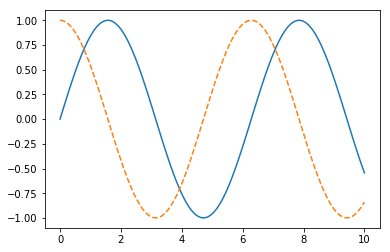

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()  # 生成一个空白图形并将其赋给fig对象
plt.plot(x, np.sin(x), '-')   # 绘制实线
plt.plot(x, np.cos(x), '--')  # 绘制虚线

请读者试试先运行%matplotlib notebook，再运行上述代码观察执行的结果。

### 7.1.4 保存图形

前面已经介绍过，Matplotlib支持各种系统和图形格式。Matplotlib的好用点还在于，保存所有图形格式的代码都是一样的，只需要调用图形对象的savefig()方法，非常简单易用。

例如，我们用png格式保存刚创建的正弦余弦曲线图，并进行检查。

In [5]:
# 保存图形
fig.savefig("first.png")

# 调用系统命令ls检查
!ls -l first.png

-rw-r--r-- 1 wsx wsx 22604 3月  11 23:39 first.png


pdf是常见的矢量图形格式，现在我们使用一样的命令，仅改动一下保存的文件拓展名。

In [6]:
# 保存pdf矢量图
fig.savefig("first.pdf")

# 调用系统命令ls检查
!ls -l first.pdf

-rw-r--r-- 1 wsx wsx 8519 3月  11 23:39 first.pdf


读者不妨使用pdf阅读器打开该文件看看。

下面代码结果列出Matplotlib支持的所有图形格式：

In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

注意，由于不同读者使用的操作系统以及安装的图形后端都可能不同，因此支持的图形格式可能也会有所变化，因而如果与上述输出不一致也是正常的。

### 7.1.5 两种绘图接口

在前面的几小节中，我们使用类似MATLAB的命令操作方式进行图形的创建工作。除了这种操作方式，Matplotlib还提供了比较原生的Python方式操作图形：这种方式把每一个图形都看作一个对象，读者可以通过对象方法的调用达到图形元素增改的目的。

MATLAB操作方式非常地简便，而面向对象的方式则功能强大。大多数数据分析师或数据科学家在代码中往往同时使用两者，因此代码阅读时容易产生困惑。本小节对两种绘图接口进行简要介绍，帮助读者理清它们的区别。

#### MATLAB样式接口

MATLAB样式接口由plt模块提供，plt包含一系列绘图命令（函数），名称与MATLAB基本一致。下面展示了如何利用plt快速绘制包含两个子图的图形：

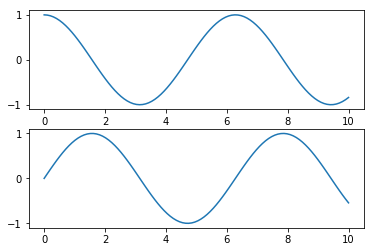

In [8]:
# 创建一个图形
plt.figure()

# 创建两个子图面板
# 创建第1个子图
plt.subplot(2, 1, 1) 
plt.plot(x, np.cos(x))  # 绘制图形

# 创建第2个子图
plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))  # 绘制图形

这里使用了3个命令，每一个都非常简明：

- figure()函数创建一个空白图形
- subplot(rows, columns, subplot_number)函数创建子图，第1个参数设定子图行数，第2个参数设定子图列数，第3个参数设定子图序号
- plot(x, y)函数绘制图形，第1个参数为x轴提供数据，第2个参数为y轴提供数据

对于简单的图形来说，这种接口是极好的，它既快又简单。然而，如果绘制的图形比较复杂，可能就不适应或者出问题了。例如，当我们在操作第2个子图的时候，想要对已经绘制的第1个子图进行增删改，该怎么办？MATLAB样式接口不可能完成这个任务。不过，我们还有更好的办法——面向对象接口。

#### 面向对象接口

面向对象接口可以应对更为复杂的绘图场景，它通过图和坐标轴等图形对象方法的调用来实现各种绘图操作。

现在，我们用面对对象接口实现刚才的图形。

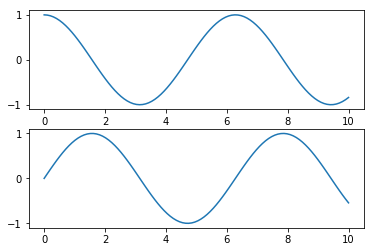

In [9]:
# 首先创建一个图形网格
fig, ax = plt.subplots(2)

# 在坐标轴对象上调用plot()方法
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))

这里subplot()函数返回一个元组，其中第2个元素是一个包含坐标轴对象的数组，在坐标轴对象上调用方法即可绘制、修改图形。

可以看到，两种接口绘制图形的操作都比较简单。对于简单的图形，选择哪一种接口取决于读者的喜好。至于绘制复杂的图形，还是需要掌握面向对象的接口。

## 7.2 基本图形绘制

上一节本书向读者介绍了Matplotlib的绘图场景以及绘图接口，这一节我们接着学习常见图形的绘制，包括线图、散点图、直方图、饼图等。不同类型的图形有很多相同的元素，在线图一小节中本书会详细地进行介绍，以便于读者在其他类型图形绘制的学习中能够快速理解、掌握和应用。

### 7.2.1 线图

线图常常用来表示某个变量随另一个变量变化的趋势，如金融领域中的经济走势图、医院中的心电图。

pyplot模块提供的plot()函数可以轻松地绘制线图，该函数需要读者提供y轴的数据或者同时提供x轴和y轴的数据。如果只提供y轴的数据，那么函数会自动将x轴数据设为同等长度的整数序列，从0开始。

下面代码结果显示无论是使用Python内置的函数range()或者使用numpy模块提供的arange()函数生成序列1到10，绘制的图形完全一致。可见我们使用Matplotlib绘图的重点是准备数据，它会自动帮我们处理好不同的数据类型。

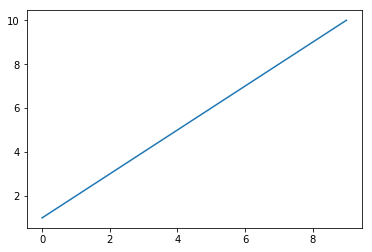

In [10]:
plt.plot(range(1, 11))

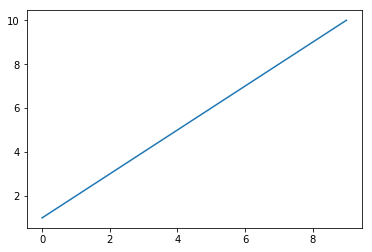

In [11]:
plt.plot(np.arange(1,11))

我们再来看看面向对象接口的使用。

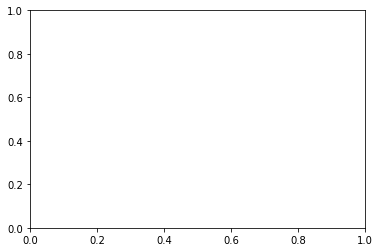

In [12]:
fig = plt.figure()
ax  = plt.axes()

In [13]:
type(fig)

matplotlib.figure.Figure

In [14]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

上面代码先使用figure()函数创建了一个Figure对象，Figure对象可以看做包含一切图形元素的容器，如坐标轴、文字、标签。axes()然后创建了一个Axes（坐标轴）对象，也就是我们上面看到的一个包含刻度和标签的箱子。

通常在使用Matplotlib绘图时，我们都使用fig指向一个Figure对象，ax指向一个坐标轴对象。

现在我们已经有了坐标轴，所需要做的是往上添加数据。在上一节中，我们使用了linspace()函数但没有进行解释，该函数可以创建一个等长的数据序列。例如，linspace(0, 5, 20)就会将0到5分割为20份。

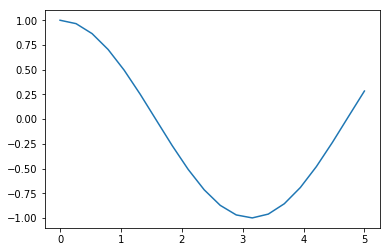

In [15]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 5, 20)
ax.plot(x, np.cos(x))

当我们需要在一个图中绘制多条曲线时，最简单的办法就是多次调用plot()函数。

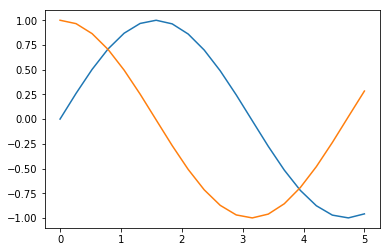

In [16]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

上面matplotlib为曲线自动设置了颜色和类型，在实际应用时我们常需要自定义，它们分别可以使用关键字参数color和linestype进行设定。

color参数接收一个代表任何颜色的字符串，支持多种不同类型的颜色编码，如名字、颜色代码、十六进制、RGB等。

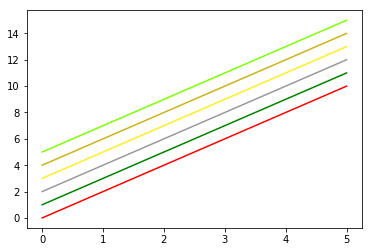

In [17]:
plt.plot(x, 2*x,   color = "red")           # 按名字指定颜色   
plt.plot(x, 2*x+1, color = "g")             # 短颜色编码（rgbcmyk）
plt.plot(x, 2*x+2, color = "0.6")           # 灰度，范围在0-1之间
plt.plot(x, 2*x+3, color = "#FFEE22")       # 十六进制编码
plt.plot(x, 2*x+4, color = (0.8, 0.7, 0.1)) # RGB元组，值从0到1
plt.plot(x, 2*x+5, color = "chartreuse")    # 支持所有的HTML颜色名字

通过设定linestype参数，我们可以展示非常丰富的线条类型，包括虚线、实现、点划线。

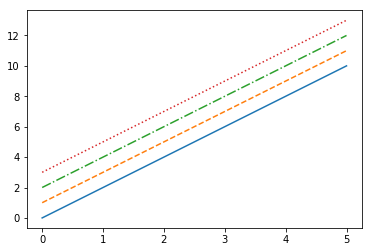

In [18]:
plt.plot(x, 2*x,   linestyle = 'solid')   # 实线
plt.plot(x, 2*x+1, linestyle = 'dashed')  # 虚线
plt.plot(x, 2*x+2, linestyle = 'dashdot') # 点划线
plt.plot(x, 2*x+3, linestyle = 'dotted')  # 小圆点

为了简便，读者也可以使用相应的字符代码。

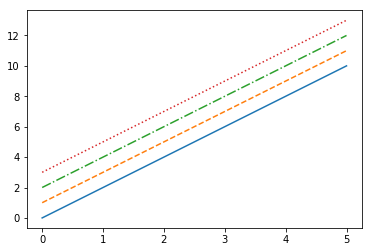

In [19]:
plt.plot(x, 2*x,   linestyle = '-')   # 实线
plt.plot(x, 2*x+1, linestyle = '--')  # 虚线
plt.plot(x, 2*x+2, linestyle = '-.')  # 点划线
plt.plot(x, 2*x+3, linestyle = ':')   # 小圆点

线条类型和颜色往往组合使用，为了简便，我们可以提供一个同时包含线条类型代码和颜色代码的字符串，作为非关键字参数传入plot()函数。

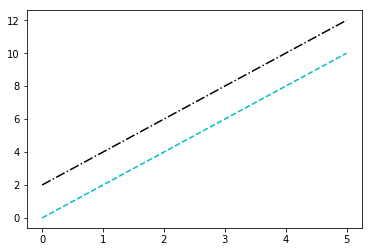

In [20]:
plt.plot(x, 2*x,   '--c')   # 青色的虚线
plt.plot(x, 2*x+2, '-.k')   # 黑色的点划线

了解了如何为线图设定颜色和线条类型后，我们接下来系统地看一下plot()函数常见的参数列表。

```
plot(x, y, linestyle,
     linewidth, color, marker,
     markersize, markeredgecolor,
     label, alpha)
```

下面是具体的说明：

* x - 线图x轴数据
* y - 线图y轴数据
* linestyle - 线条类型
* linewidth - 线条宽度
* color - 颜色
* marker - 可以为线图添加散点，该参数指定点的形状
* markersize - 指定点的大小
* markeredgecolor - 指定点的边框色
* label - 图例标签

虽然plot()函数提供了图例标签信息，但需要配合legend()函数才能显示。

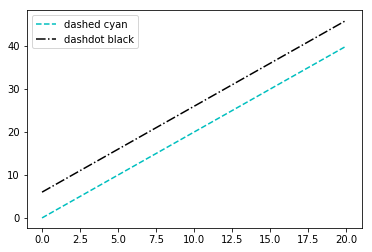

In [21]:
x = np.linspace(0, 20, 100)
plt.plot(x, 2*x,   '--c', label = 'dashed cyan')
plt.plot(x, 2*x+6, '-.k', label = 'dashdot black')

plt.legend()

plot()函数其他几个选项主要用于自定义线条和描述数据点。线图中线条描述了连续的变化，但实际观测的数据值是有限的，因此在一些分析中，同时观测线条和点是非常有必要的。

下面的代码示例将plot()函数涉及的选项都进行自定义设定。

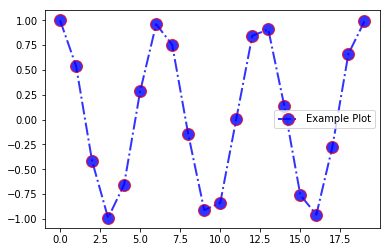

In [22]:
x = range(0, 20)
y = np.cos(x)

plt.plot(x, y, linestyle = '-.',
     linewidth = 2, color = 'blue', marker = 'o',
     markersize = 12, markeredgecolor = 'red',
     label = 'Example Plot', alpha = 0.8)
plt.legend()

了解了如何创建一个美观的带点线图后，读者只要对相应的选项略加更改就可以创建自己喜欢的线图。线条与点的类型、颜色与大小的选择在实际应用时都需要花费时间进行探索。

图形的作用除了显示数据的变化趋势或模式，还常用于比较。下面代码新增了一条红色的曲线，两者的差异一目了然。

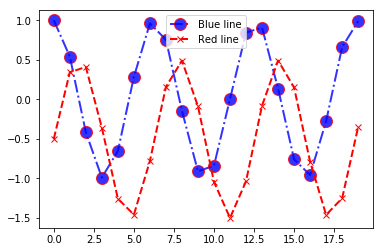

In [23]:
x = range(0, 20)
y = np.cos(x)
y2 = np.sin(x) - 0.5

plt.plot(x, y, linestyle = '-.',
     linewidth = 2, color = 'blue', marker = 'o',
     markersize = 12, markeredgecolor = 'red',
     label = 'Blue line', alpha = 0.8)
plt.plot(x, y2, linestyle = '--',
     linewidth = 2, color = 'red', marker = 'x',
     markersize = 6, markeredgecolor = 'red',
     label = 'Red line')
plt.legend()

图虽然现在已经绘制好了，但缺乏一些必要的说明：坐标轴标签以及图标题。

实现这些需求非常简单，x与y轴标签可以分别通过xlabel()和ylabel()函数添加，而图标题可以使用title()添加。

为方便演示，下面代码绘制一条简单的余弦曲线，并添加轴标签和标题。

Text(0.5,1,'A simple cosine curve')

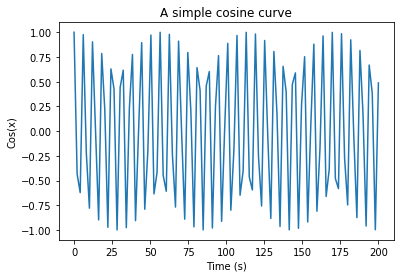

In [24]:
x = np.linspace(0, 200, 100)
plt.plot(x, np.cos(x))
plt.xlabel('Time (s)')
plt.ylabel('Cos(x)')
plt.title('A simple cosine curve')

上面所有绘制的图形都显示了所有的数据区域，有时候我们想要把焦点放到某一个区域，这时需要对轴的范围进行限制，针对x轴和y轴的范围的限制Matplotlib提供了xlim()和ylim()实现。

现在我们将x轴范围限定在50到150，y轴范围限定在-0.5到0.5。

(-0.5, 0.5)

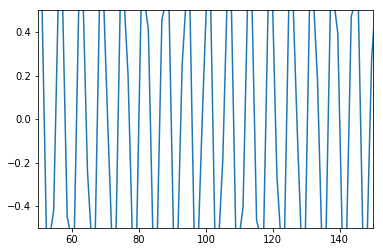

In [25]:
plt.plot(x, np.cos(x))
plt.xlim(50, 150)
plt.ylim(-0.5, 0.5)

如果我们将上面设定的参数值反过来，我们就实现了坐标轴的反转。

(0.5, -0.5)

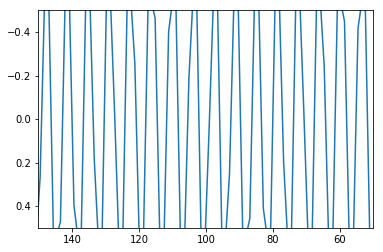

In [26]:
plt.plot(x, np.cos(x))
plt.xlim(150, 50)
plt.ylim(0.5, -0.5)

除了使用xlim()和ylim()函数分别设置x轴和y轴的范围，Matplotlib还提供了函数axis()对它们同时进行设定，该函数需要一个形如[xmin, xmax, ymin, ymax]的列表作为参数。

Text(0.5,1,'A cosine curve with limited x and y')

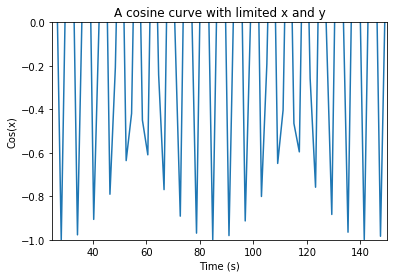

In [27]:
plt.plot(x, np.cos(x))
plt.axis([25, 150, -1, 0])
plt.xlabel('Time (s)')
plt.ylabel('Cos(x)')
plt.title('A cosine curve with limited x and y')

有意思的是，axis()函数除了支持数值列表作为输入，还支持字符选项，Matplotlib会根据输入的字符选项自动地对轴进行调整，这对用户实在太有好不过了。

axis()函数常见支持的选项有：

- axis('off')    - 关闭轴线和标签
- axis('equal')  - 使x轴与y轴保持与屏幕一致的高宽比（横纵比）
- axis('tight')  - 使x与y轴限制在有数据的区域
- axis('square') - 使x与y轴坐标一致

下面通过一些图来认识这些选项的实际效果，其他axis()支持的选项请通过plt.axis?访问函数文档。

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

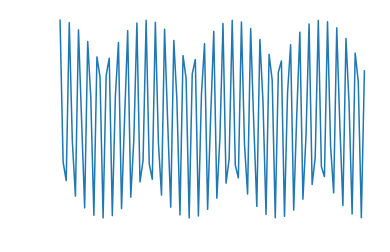

In [28]:
# 去掉轴
plt.plot(x, np.cos(x))
plt.axis('off')

(-10.0, 210.0, -1.0999621189366728, 218.90003788106333)

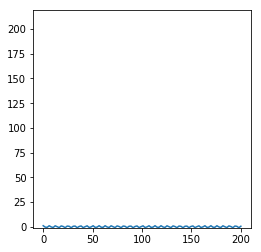

In [29]:
# 使x与y轴坐标完全一致
plt.plot(x, np.cos(x))
plt.axis('square')

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

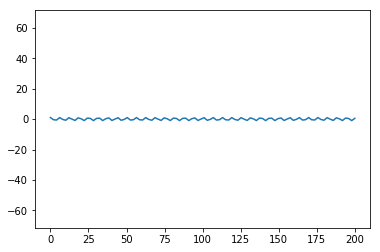

In [30]:
# 与屏幕一致的横纵比
plt.plot(x, np.cos(x))
plt.axis('equal')

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

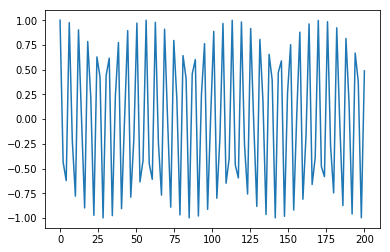

In [31]:
# 默认的选项
plt.plot(x, np.cos(x))
plt.axis('tight')

这一小节本书以线图为对象向读者详细地介绍了如何使用Matplotlib绘制线图这一常见的图形以及如何添加标签、标题、轴范围限定等等自定自定义操作。有了线图作为学习的基础，本书接下来的几个小节将不再对自定义的操作进行赘述，只对基础图形的绘图函数进行必要的介绍。

### 7.2.2 散点图

散点图在观察数据量以及数据的分布时非常有用。在上一小节中我们其实已经使用plot()函数在线图的基础上添加过点图。

Matplotlib提供了两种方式绘制点图。

Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over plt.scatter for large datasets.

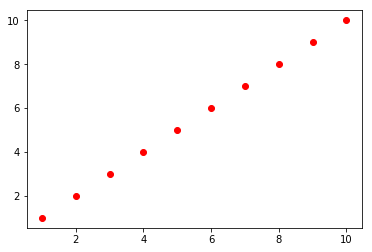

In [37]:
x = range(1, 11)
plt.plot(x, x, "o", color = "red")

Python提供了scatter()函数用于绘制散点图，使用关键字参数marker可以设定点的类型，默认是用"o"表示的小圆点。

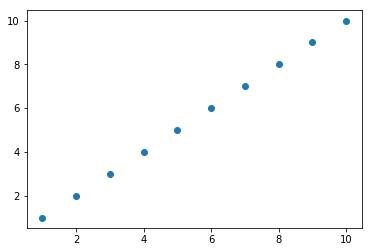

In [32]:
x = range(1, 11)
plt.scatter(x, x)

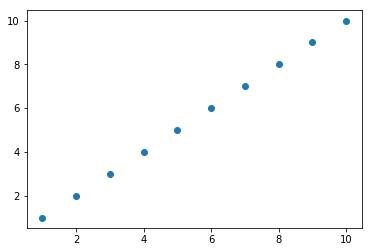

In [33]:
plt.scatter(x, x, marker = 'o')

Python支持很多种点类型。


上一小节我们绘制线图使用的数据其实也是数据点，绘制散点图只需要将绘图函数plot()改为scatter()。



### 7.2.3 条形图

### 7.2.4 直方图

### 7.2.5 饼图

### 7.2.6 箱线图

## 多图与自定义

### 多图

### 设置风格


使用plt.style()函数可以为创建的图形设置合适的美学风格。下面代码可以确保生成的图形使用经典的Matplotlib风格：

plt.style.use('classic')

### 设置坐标轴范围

### 添加图例


### 两种接口映射

plt.plot()  -> ax.plot()
plt.legend() -> ax.legend()
plt.xlabel() -> ax.set_xlabel()
plt.ylabel() -> ax.set_ylabel()
plt.xlim()   -> ax.set_xlim()
plt.ylim()   -> ax.set_ylim()
plt.title()  -> ax.set_title()

使用面向对象的方式，可以使用set()方法一次性对所有样式进行设定。


[(-2, 2),
 Text(0,0.5,'sin(x)'),
 (0, 10),
 Text(0.5,0,'x'),
 Text(0.5,1,'A Simple Plot')]

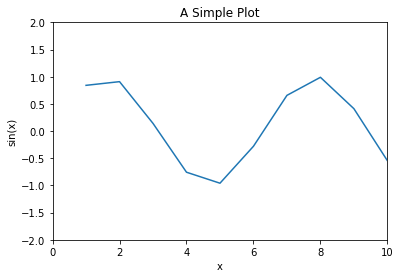

In [34]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10), ylim=(-2,2),
      xlabel='x', ylabel='sin(x)',
      title='A Simple Plot')

## 7.4 章末小结